# K-Nearest Neighbors (KNN)

**k-Nearest Neighbors (k-NN)** is a simple, yet powerful, supervised machine learning algorithm used for both classification and regression tasks. The key idea behind k-NN is that an instance is classified by a majority vote of its neighbors, with the instance being assigned to the class most common among its k nearest neighbors. For regression, the prediction is typically the average value of the nearest neighbors.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns 

In [3]:
from sklearn.metrics import confusion_matrix, classification_report,roc_curve,accuracy_score, \
                            precision_score, recall_score,f1_score,roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

In [4]:
X_train = pd.read_csv('dataset/X_train_smote.csv.', sep = ';')
y_train = pd.read_csv('dataset/y_train_smote.csv.', sep = ';')
X_test = pd.read_csv('dataset/X_test.csv.', sep = ';')
y_test = pd.read_csv('dataset/y_test.csv.', sep = ';')

In [5]:
print(X_train.shape)
print(y_train.shape)

(38359, 55)
(38359, 1)


In [6]:
print(X_test.shape)
print(y_test.shape)

(6096, 55)
(6096, 1)


## KNN Model

In [7]:
knn = KNeighborsClassifier(n_neighbors=5)

In [8]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [9]:
y_pred_knn = knn.predict(X_test)
y_pred_knn_proba = knn.predict_proba(X_test)[:, 1] 

In [10]:
print("KNN Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Performance:
Accuracy: 0.859251968503937
              precision    recall  f1-score   support

           0       0.96      0.87      0.92      5309
           1       0.47      0.78      0.59       787

    accuracy                           0.86      6096
   macro avg       0.72      0.83      0.75      6096
weighted avg       0.90      0.86      0.87      6096



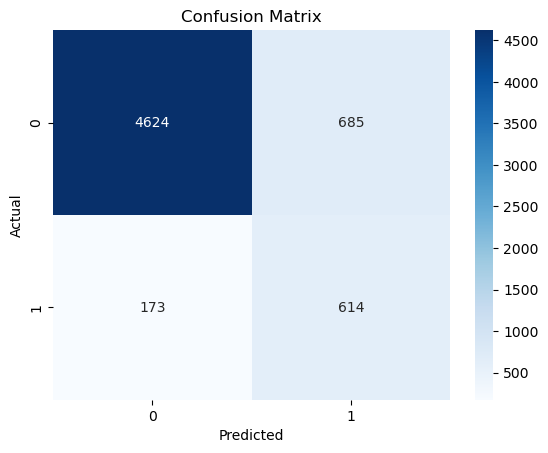

In [11]:
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [12]:
roc_auc_knn = roc_auc_score(y_test, y_pred_knn_proba)
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn_proba)


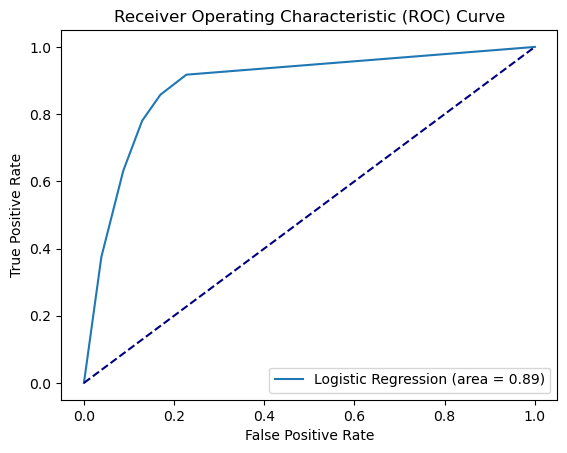

In [13]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Feature Importance in KNN

k-NN does not have an intrinsic method to measure feature importance, as it is a distance-based algorithm. However, you can approximate feature importance using Permutation Importance or by seeing how the model's accuracy changes when specific features are removed.

In [14]:
from sklearn.inspection import permutation_importance

In [15]:
# Compute permutation feature importance
perm_importance = permutation_importance(knn, X_test, y_test, n_repeats=10, random_state=42)

In [27]:
# Get absolute permutation importance values (optional)
importances_mean = np.abs(perm_importance.importances_mean)

In [28]:
# Get feature names
feature_names = X_train.columns

In [29]:
# Get the sorted indices of feature importances
sorted_idx = importances_mean.argsort()[::-1][:15]  # Sort and keep top 15

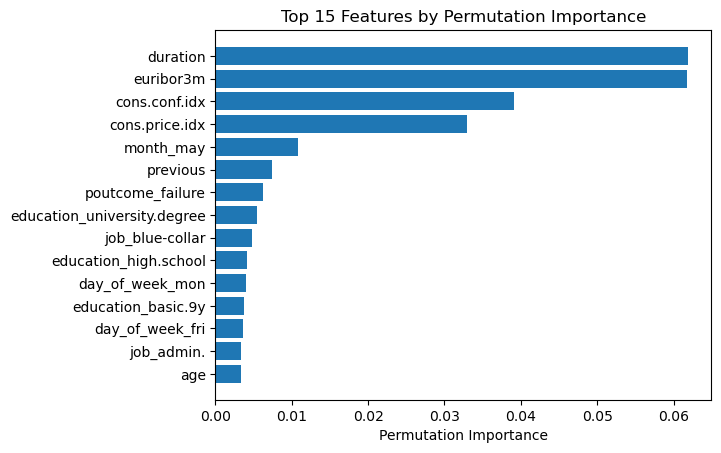

In [30]:
# Plot only the top 15 most important features
plt.barh(feature_names[sorted_idx], importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Top 15 Features by Permutation Importance")
plt.gca().invert_yaxis()  # To have the highest importance at the top
plt.show()

In [31]:
# Get the top 15 feature names based on permutation importance
top_15_features = feature_names[sorted_idx[:15]]

In [32]:
X_train_15 = X_train[top_15_features]
X_test_15 = X_test[top_15_features]

In [33]:
# Train the model with top 15 features
knn.fit(X_train_15, y_train)

KNeighborsClassifier()

In [37]:
# Predict on the test set
y_pred_15 = knn.predict(X_test_15)
y_pred_15_proba = knn.predict_proba(X_test_15)[:, 1] 

In [38]:
print("KNN Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_15))
print(classification_report(y_test, y_pred_15))

KNN Performance:
Accuracy: 0.865485564304462
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      5309
           1       0.49      0.77      0.60       787

    accuracy                           0.87      6096
   macro avg       0.72      0.83      0.76      6096
weighted avg       0.90      0.87      0.88      6096



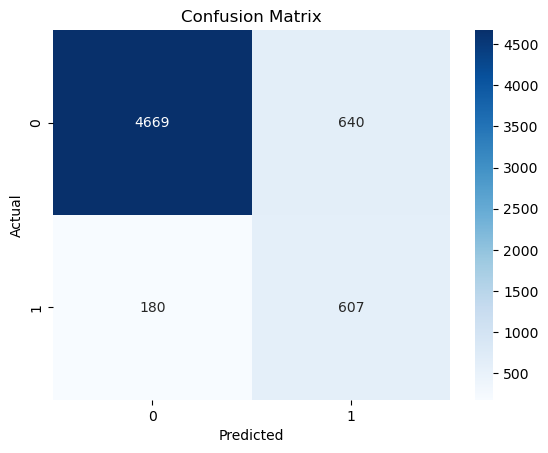

In [39]:
cm = confusion_matrix(y_test, y_pred_15)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [41]:
roc_auc_knn_15 = roc_auc_score(y_test, y_pred_15_proba)
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_15_proba)

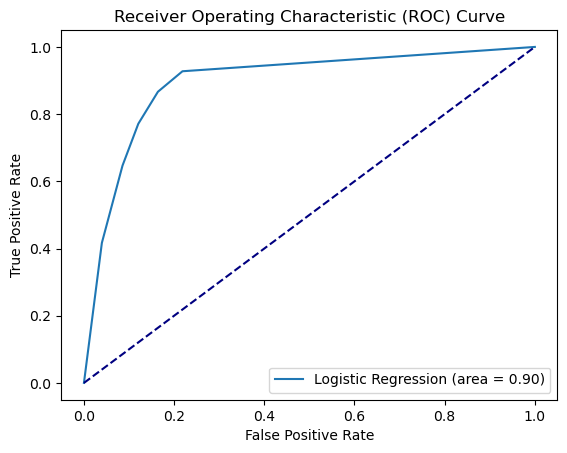

In [42]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc_knn_15)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Hyperparameter Tuning

Hyperparameter tuning is the process of optimizing the hyperparameters of a machine learning model to improve its performance. Unlike model parameters (which are learned from the data, such as the coefficients in linear regression), hyperparameters are set before training begins and guide the learning process.

Hyperparameter tuning for k-NN can be done efficiently using GridSearchCV to find the optimal number of neighbors (k). Here's a step-by-step guide to apply hyperparameter tuning on the k-NN model:

In [21]:
from sklearn.model_selection import GridSearchCV

In [43]:
# Define the parameter grid
param_grid = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],  
    'metric': ['euclidean', 'manhattan', 'minkowski'],  
    'n_neighbors': range(1, 31)
}

In [44]:
# Set up grid search
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')

In [45]:
# Fit the model
grid_search.fit(X_train_15, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': range(1, 31),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [47]:
# Best hyperparameters
print(f"Best Hyperparameters: {grid_search.best_params_}")

Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}


In [48]:
# Use the best estimator from GridSearchCV
best_knn = grid_search.best_estimator_

In [49]:
# Predict on the test set
y_pred_15_best = best_knn.predict(X_test_15)
y_pred_15_best_proba = best_knn.predict_proba(X_test_15)[:, 1] 

In [50]:
# Evaluate the model
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_15_best))
print(classification_report(y_test, y_pred_15_best))

Logistic Regression Performance:
Accuracy: 0.869258530183727
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      5309
           1       0.50      0.71      0.58       787

    accuracy                           0.87      6096
   macro avg       0.72      0.80      0.75      6096
weighted avg       0.89      0.87      0.88      6096



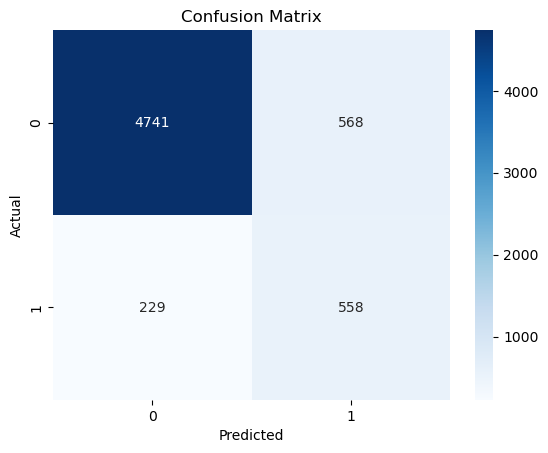

In [51]:
cm = confusion_matrix(y_test, y_pred_15_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

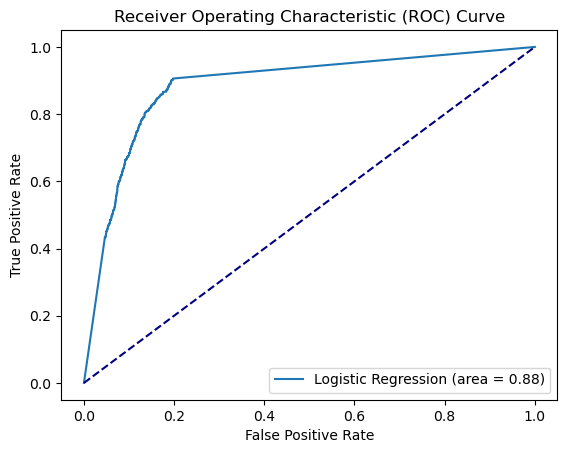

In [52]:
roc_auc_lr = roc_auc_score(y_test, y_pred_15_best_proba)
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_15_best_proba)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()